<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_05_CV_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import the necessary libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Manual Separation for Cross-Validation

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Convert data from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species into numbers
labels = torch.zeros(len(data), dtype=torch.long)

# Labels for the species
labels[iris.species == "seosa"] = 0
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

In [4]:
data[1:5,:]

tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [5]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Separate into Train and Test Set

In [6]:
# define the proportion of training set
propTraining = 0.8
nTraining = int(len(labels)*propTraining)

# initialize a boolean vector to select data and their labels
traintestBool = np.zeros(len(labels), dtype=bool)

# One way to select samples
traintestBool[range(nTraining)] = True

traintestBool
# Very bad way, picks almost exclussively the last category

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [7]:
# Test data balance
# remember, data were labeled as 0, 1 and 2. Average always expected to be 1
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(0.7500)

Average of Test Data
tensor(2.)


In [10]:
# A better way to separate the dataset
traintestBool = np.zeros(len(labels), dtype=bool)
items2use4train = np.random.choice(range(len(labels)),nTraining, replace=False)
traintestBool[items2use4train] = True
traintestBool

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [11]:
# Now check the balance
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(1.0417)

Average of Test Data
tensor(0.8333)


In [12]:
# Create the ANN Model
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

In [14]:
# Check data shape
# Entire dataset
print(data.shape)
print()

# Training Data
print(data[traintestBool,:].shape)
print()

# test set
print(data[~traintestBool, :].shape)

torch.Size([150, 4])

torch.Size([120, 4])

torch.Size([30, 4])


In [15]:
# Train the model
numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # forwad pass
    yHat = ANNiris(data[traintestBool,:])

    # Copute accuracy
    ongoingAcc.append(100*torch.mean((
        torch.argmax(yHat,axis=1) == labels[traintestBool]).float()))
    
    # Compute loss
    loss = lossfun(yHat, labels[traintestBool])
    losses[epochi] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [16]:
# Compute train and test accuracies

# Final forward pass using training data
predictions = ANNiris(data[traintestBool,:])
trainacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[traintestBool]).float())

# Final forward pass using test data
predictions = ANNiris(data[~traintestBool,:])
testacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[~traintestBool]).float())

In [17]:
print("Final train accuracy is {:.3f}%".format(trainacc))
print()
print("Final test accuracy is {:.3f}%".format(testacc))

Final train accuracy is 98.333%

Final test accuracy is 93.333%


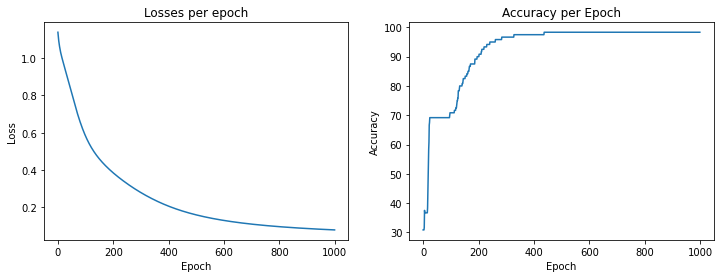

In [18]:
# Loss by epoch
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Losses per epoch")

ax[1].plot(ongoingAcc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Accuracy per Epoch")

plt.show()

## Cross-Validation with Scikitlearn

In [25]:
# How to use the train-test split
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print()
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [30]:
# Use sikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=0.2)

# Note the third parameter: it can be specified as test size or train size
# Read carefully

# print out the sizes
print("Train data size: {}".format(train_data.shape))
print()
print("Test data size: {}".format(test_data.shape))

# Print out the train/test data
print("Training Data:")
print(train_data)
print()
print("Test Data:")
print(test_data)
# Randomizing the order of the rows (shuffle = True by default) and train/testing data

Train data size: (8, 4)

Test data size: (2, 4)
Training Data:
[[101 102 103 104]
 [ 91  92  93  94]
 [ 11  12  13  14]
 [ 81  82  83  84]
 [ 61  62  63  64]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 21  22  23  24]]

Test Data:
[[71 72 73 74]
 [51 52 53 54]]


In [40]:
# Define the model
def createANewModel():

    # Define model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
        )
    
    # Loss function
    lossfun = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01)

    return ANNiris, lossfun, optimizer

In [41]:
# Define function to train the model

numepochs = 200
def trainTheModel(trainProp):

    # separate train from test data
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    # Initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop overr the epochs
    for epochi in range(numepochs):


        # Forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossfun(yHat, y_train)

        # Back Propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute the training accuracy
        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item())

        # test accuracy
        predlabels = torch.argmax(ANNiris(X_test), axis=1)
        testAcc.append(100*torch.mean((predlabels == y_test).float()).item())

    return trainAcc, testAcc

In [42]:
# Run the mmodel once to make sure its working
ANNiris, lossfun, optimizer = createANewModel()

# Train it
trainAcc, testAcc = trainTheModel(0.8)

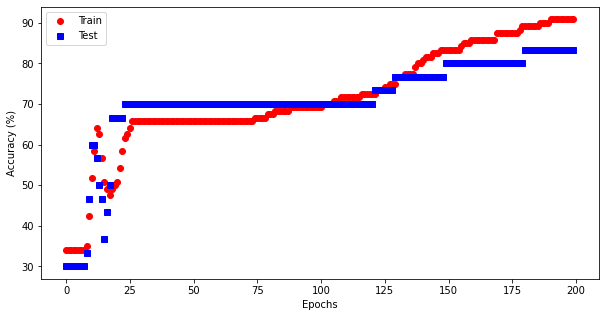

In [43]:
# Plot the results
fir = plt.figure(figsize=(10,5))
plt.plot(trainAcc, "ro")
plt.plot(testAcc, "bs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Test"])
plt.show()

In [44]:
print(trainAcc[-1])
print()
print(testAcc[-1])

90.83333611488342

83.33333134651184


In [45]:
trainSetSizes = np.linspace(0.2, 0.95, 10)

allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):
    # Create the model
    ANNiris, lossfun, optimizer = createANewModel()

    # Train the model
    trainAcc, testAcc = trainTheModel(trainSetSizes[i])

    # store
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

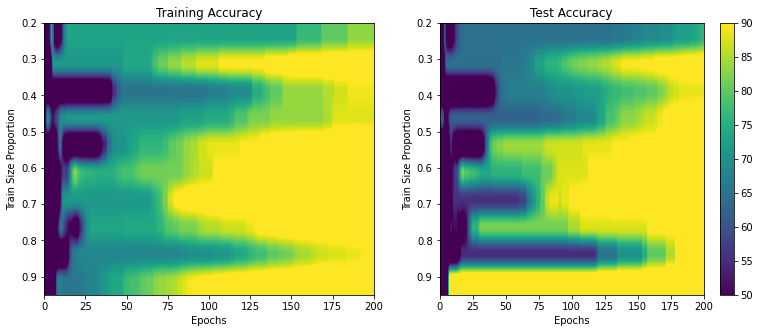

In [50]:
# Plot the stuff
fig,ax = plt.subplots(1,2, figsize=(13,5))
ax[0].imshow(allTrainAcc, aspect="auto", vmin=50, vmax=90,
             extent=[0,numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Train Size Proportion")
ax[0].set_title("Training Accuracy")

p = ax[1].imshow(allTestAcc, aspect="auto", vmin=50, vmax=90,
             extent=[0,numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Train Size Proportion")
ax[1].set_title("Test Accuracy")
fig.colorbar(p, ax=ax[1])
plt.show()